In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import combinations
from typing import Any
from rich import print
import matplotlib.pyplot as plt
import numpy as np
import re

import pickle
import torch
import torch.nn.functional as functional
from torch.utils.data import random_split
from torch_geometric.data import DataLoader
from collab_env.gnn.gnn import load_model, debug_result2prediction
from pathlib import Path
from collab_env.data.file_utils import expand_path, get_project_root
from collab_env.gnn.plotting_utility import load_rollout

from collab_env.sim.boids_gnn_temp.animal_simulation_from_data_old import visualize_graph_2sets, static_visualize_2sets

from collab_env.gnn.utility import dataset2testloader
from collab_env.gnn.plotting_utility import load_various_data, load_rollout

%matplotlib widget

## Node feature transformation

In [7]:
model_name = "vpluspplus_a"
data_name = "boid_single_species_weakalignment_large"
model_rel_path_prefix = f"trained_models/{data_name}/trained_models/boid_single_species_weakalignment_large_vpluspplus_a_n0.005_h1_vr0.5_s"


In [10]:
def show_weight_matrix(model):
    # extract the Theta matrix from the graph attention layer
    weight_matrix = model.gatn.lin.weight.detach().numpy()
    print(f"weight_matrix.shape: {weight_matrix.shape}")
    # plot column distributions as violin plots
    plt.figure(figsize=(5,3))
    plt.violinplot(weight_matrix)
    plt.title('Column Distributions of Weight Matrix')
    plt.xlabel('Column Index')
    plt.ylabel('Weight Value')
    plt.show()

2025-08-29 09:19:18.417 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:18.418 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:18.420 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

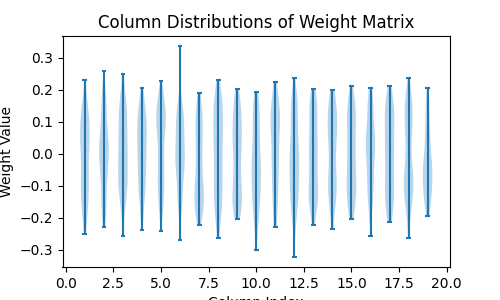

2025-08-29 09:19:18.492 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:18.493 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:18.495 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

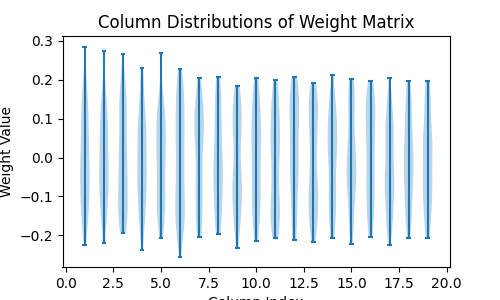

2025-08-29 09:19:18.568 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:18.569 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:18.573 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

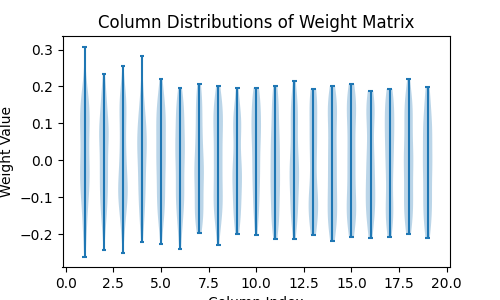

2025-08-29 09:19:18.644 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:18.645 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:18.647 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

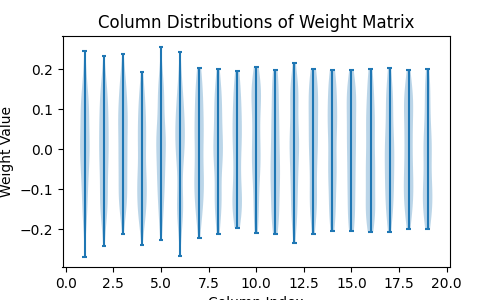

2025-08-29 09:19:18.719 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:18.719 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:18.721 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

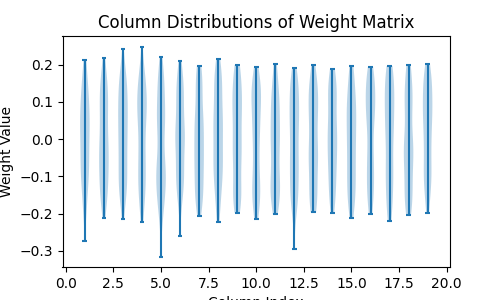

2025-08-29 09:19:18.790 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:18.790 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:18.792 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

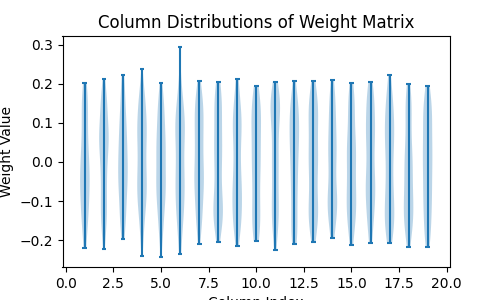

2025-08-29 09:19:18.862 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:18.862 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:18.865 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

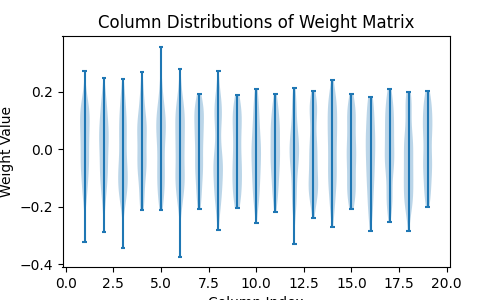

2025-08-29 09:19:18.937 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:18.938 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:18.940 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

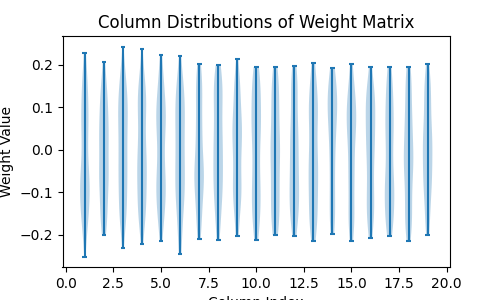

2025-08-29 09:19:19.010 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:19.010 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:19.012 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

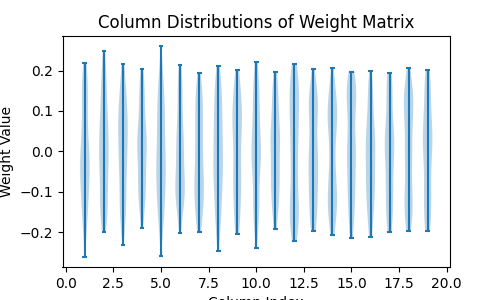

2025-08-29 09:19:19.184 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:19.185 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:19.188 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

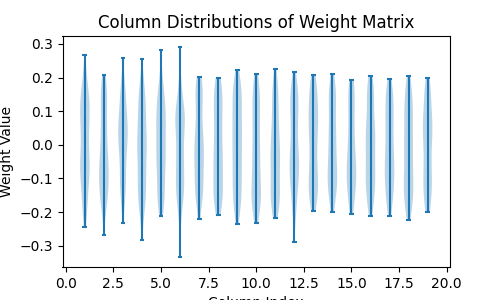

2025-08-29 09:19:19.257 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:19.257 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:19.259 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

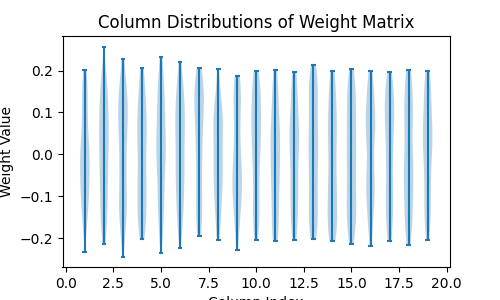

2025-08-29 09:19:19.334 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:19.335 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:19.337 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

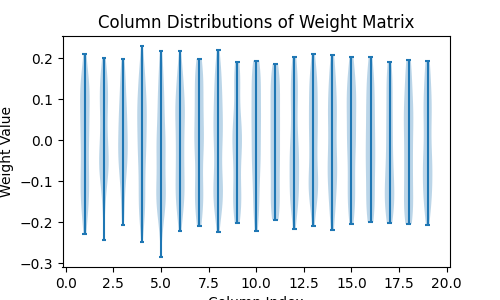

2025-08-29 09:19:19.409 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:19.409 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:19.412 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

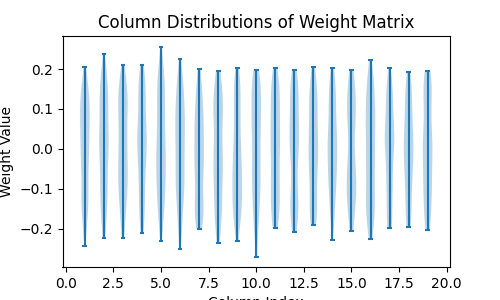

2025-08-29 09:19:19.484 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:19.485 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:19.487 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

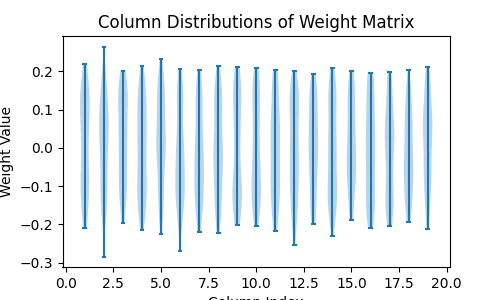

2025-08-29 09:19:19.563 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:19.563 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:19.565 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

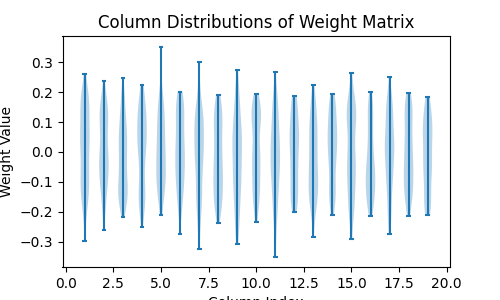

2025-08-29 09:19:19.658 | DEBUG    | collab_env.gnn.gnn:load_model:956 - Loaded model spec.
2025-08-29 09:19:19.663 | DEBUG    | collab_env.gnn.gnn:load_model:961 - Loaded training spec.
2025-08-29 09:19:19.668 | DEBUG    | collab_env.gnn.gnn:load_model:982 - Loaded model.


{
    'model_name': 'vpluspplus_a',
    'node_feature_function': 'vel_plus_pos_plus',
    'node_prediction': 'acc',
    'prediction_integration': 'Euler',
    'input_differentiation': 'finite',
    'in_node_dim': 19,
    'start_frame': 3,
    'heads': 1
}

{'visual_range': 0.5, 'sigma': 0.005, 'epochs': 10}

weight_matrix.shape: (128, 19)

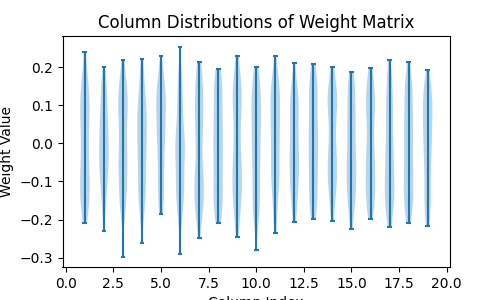

In [11]:
for seed in range(16):
    model_rel_path = f"{model_rel_path_prefix}{seed}"
    model, mdl_spec, mdl_train_spec = load_model(model_name, model_rel_path, ".")
    print(mdl_spec)
    print(mdl_train_spec)
    show_weight_matrix(model)

## Rollout

In [12]:
seed = int(model_rel_path.split("_s")[-1])
rollout_spec = {
    "noise": mdl_train_spec["sigma"],
    "head": mdl_spec["heads"],
    "visual_range": mdl_train_spec["visual_range"],
    "seed": seed,
    "rollout_starting_frame": 5,
    "rollout_frames": 300,
}
print(rollout_spec)

{'noise': 0.005, 'head': 1, 'visual_range': 0.5, 'seed': 15, 'rollout_starting_frame': 5, 'rollout_frames': 300}

In [14]:
# load the corresponding rollout
rollout_result = load_rollout(model_name, data_name,
                              root_path=f"trained_models/{data_name}/rollouts",
                              **rollout_spec)

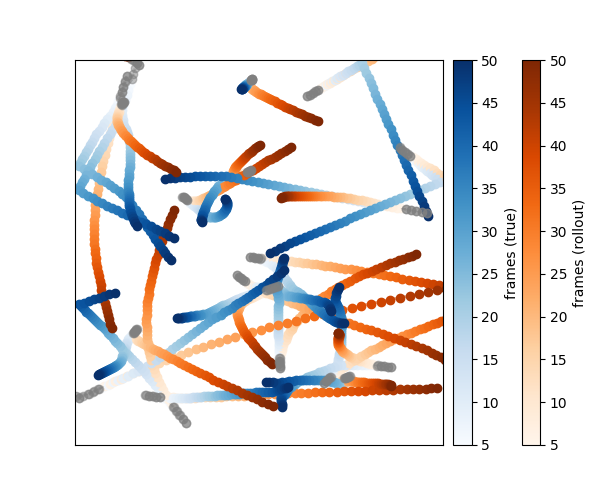

In [15]:
file_id = 5

actual_pos, actual_vel, actual_acc, gnn_pos, gnn_vel, gnn_acc, frame_sets = debug_result2prediction(
                    rollout_result,
                    file_id = file_id, epoch_num = 0)


starting_frame = 0
rollout_starting_frame = 5
ending_frame = 50
ax = static_visualize_2sets(actual_pos[0], actual_vel[0], gnn_pos[0], gnn_vel[0],
                starting_frame = starting_frame, rollout_starting_frame = rollout_starting_frame, 
                            ending_frame = ending_frame)

## Instance-level explanation

In [ ]:
# feature importance